# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [2]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [3]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [4]:
print(iris.keys())
print(iris["filename"])
print(iris["data"][:10])
print(type(iris["data"]))
print(iris["target_names"])
print(iris["target"])
print(iris["feature_names"])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# we only take the first two features. 
x=iris["data"][:,:2]
#print(x)
print(x.shape)
y=iris["target"]
#print(y)
print(y.shape)

(150, 2)
(150,)


In [5]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris["data"], columns=iris["feature_names"])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
print("target_names: "+str(iris["target_names"]))

target_names: ['setosa' 'versicolor' 'virginica']


In [7]:
#建立Target欄位與資料
y=pd.DataFrame(iris["target"], columns=["target"])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [9]:
#合併資料特徵欄位與目標欄位
iris_data=pd.concat([x,y],axis=1)
iris_data=iris_data[["sepal length (cm)","petal length (cm)","target"]]
iris_data.head(10)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [10]:
#只選擇目標為0與1的資料
iris_data=iris_data[iris_data["target"].isin([0,1])]
iris_data

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


## 切分訓練集與測試集
> train_test_split()

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(iris_data[["sepal length (cm)","petal length (cm)"]],iris_data[["target"]],test_size=0.2)

In [14]:
print(X_train.shape)
X_train.head()

(80, 2)


,sepal length (cm),petal length (cm)
50,7.0,4.7
33,5.5,1.4
24,4.8,1.9
72,6.3,4.9
46,5.1,1.6


In [15]:
print(X_test.shape)
X_test.head()

(20, 2)


,sepal length (cm),petal length (cm)
3,4.6,1.5
8,4.4,1.4
64,5.6,3.6
35,5.0,1.2
9,4.9,1.5


In [17]:
print(Y_train.shape)
Y_train.head()

(80, 1)


,target
50,1
33,0
24,0
72,1
46,0


In [18]:
print(Y_test.shape)
Y_test.head()

(20, 1)


,target
3,0
8,0
64,1
35,0
9,0


# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [32]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [54]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
print(arr_x_train[:10])

arr_y_train = np.array(Y_train)

[[ 2.31603784  1.17339086]
 [-0.04726608 -1.10436787]
 [-1.15014124 -0.75925291]
 [ 1.21316268  1.31143685]
 [-0.67748046 -0.96632189]
 [-0.67748046 -0.8972989 ]
 [-0.51992686 -1.03534488]
 [-0.20481967 -0.8972989 ]
 [-0.51992686 -1.03534488]
 [ 0.89805549  1.10436787]]


C:\jup\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\jup\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\jup\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [55]:
stats = norm_stats(X_test)
arr_x_test = np.array(z_score(X_test, stats))
print(arr_x_test[:10])

arr_y_test = np.array(Y_test)

[[-1.06236171 -0.63276563]
 [-1.39696383 -0.71137006]
 [ 0.61064886  1.01792732]
 [-0.39315749 -0.86857891]
 [-0.56045854 -0.63276563]
 [-0.39315749 -0.55416121]
 [ 0.27604674 -0.47555678]
 [ 0.77794992 -0.63276563]
 [ 0.77794992 -0.47555678]
 [-0.56045854  0.78211404]]


C:\jup\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\jup\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\jup\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## use sklearn

In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.(X_train)
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.53 3.  ]
[0.63470466 1.4487926 ]


In [50]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:10]

array([[ 2.31603784,  1.17339086],
       [-0.04726608, -1.10436787],
       [-1.15014124, -0.75925291],
       [ 1.21316268,  1.31143685],
       [-0.67748046, -0.96632189],
       [-0.67748046, -0.8972989 ],
       [-0.51992686, -1.03534488],
       [-0.20481967, -0.8972989 ],
       [-0.51992686, -1.03534488],
       [ 0.89805549,  1.10436787]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [51]:
X_test_std = sc.transform(X_test) #sc's statistics for training
print(X_test_std[:10])

[[-1.46524843 -1.03534488]
 [-1.78035562 -1.10436787]
 [ 0.11028752  0.41413795]
 [-0.83503405 -1.24241385]
 [-0.99258765 -1.03534488]
 [-0.83503405 -0.96632189]
 [-0.20481967 -0.8972989 ]
 [ 0.26784111 -1.03534488]
 [ 0.26784111 -0.8972989 ]
 [-0.99258765  0.20706898]]


you can also use fit_transform method (i.e., fit and then transform)    

In [56]:
sc=StandardScaler()
X_train_std = sc.fit_transform(X_train)  #sc.fit_transform
X_test_std = sc.fit_transform(X_test)
print(X_train_std[:10])
print(X_test_std[:10])


[[ 2.31603784  1.17339086]
 [-0.04726608 -1.10436787]
 [-1.15014124 -0.75925291]
 [ 1.21316268  1.31143685]
 [-0.67748046 -0.96632189]
 [-0.67748046 -0.8972989 ]
 [-0.51992686 -1.03534488]
 [-0.20481967 -0.8972989 ]
 [-0.51992686 -1.03534488]
 [ 0.89805549  1.10436787]]
[[-1.06236171 -0.63276563]
 [-1.39696383 -0.71137006]
 [ 0.61064886  1.01792732]
 [-0.39315749 -0.86857891]
 [-0.56045854 -0.63276563]
 [-0.39315749 -0.55416121]
 [ 0.27604674 -0.47555678]
 [ 0.77794992 -0.63276563]
 [ 0.77794992 -0.47555678]
 [-0.56045854  0.78211404]]


In [40]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: 0.0
std of X_train_std: 0.9999999999999998


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


49.42787608107948
30.192891723451403


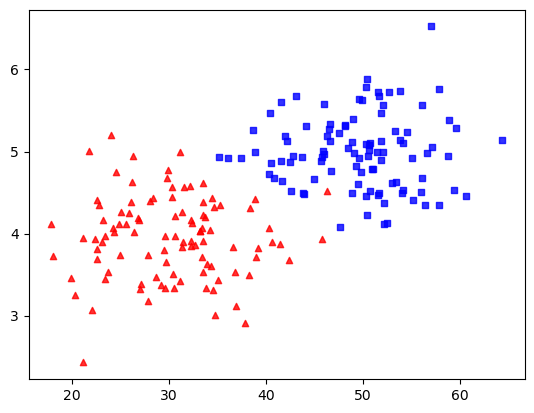

In [57]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [58]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [59]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [60]:
minmax_norm(x_val[:10])

array([0.26267658, 0.63244457, 0.45359883, 0.40417915, 0.74826234,
       0.80090283, 0.        , 0.92382144, 0.3783199 , 1.        ])

In [61]:
from sklearn.preprocessing import MinMaxScaler

x_val=x_val.reshape(-1, 1) #1D-->2D
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.data_min_)
print(scaler.transform(x_val)[:10])

[64.30694077]
[17.85742217]
[[0.45207874]
 [0.56420609]
 [0.50997344]
 [0.49498756]
 [0.59932633]
 [0.61528888]
 [0.37242547]
 [0.65256235]
 [0.48714608]
 [0.67566251]]
